<a href="https://colab.research.google.com/github/MTahaRF/Plant-Disease-Classification/blob/main/PlantDiseaseClassificationResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download and extract the dataset into the 'train' folder
!mkdir -p train  # Ensure 'train' folder exists
!wget -O train/train_backup.zip https://github.com/MTahaRF/Plant-Disease-Classification/raw/refs/heads/main/train_backup.zip
!unzip train/train_backup.zip -d train
!rm train/train_backup.zip  # Remove the ZIP file after extraction
!pip install ultralytics

--2025-02-28 16:21:56--  https://github.com/MTahaRF/Plant-Disease-Classification/raw/refs/heads/main/train_backup.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MTahaRF/Plant-Disease-Classification/refs/heads/main/train_backup.zip [following]
--2025-02-28 16:21:57--  https://raw.githubusercontent.com/MTahaRF/Plant-Disease-Classification/refs/heads/main/train_backup.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9379862 (8.9M) [application/zip]
Saving to: ‘train/train_backup.zip’

train/train_backup. 100%[===================>]   8.95M  --.-KB/s    in 0.07s   

2025-02-28 16:21:57 (121 M

In [2]:
# ==========================
# YOLOv8 Results Visualizer
# ==========================

import os
import cv2
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from IPython.display import display
from ultralytics import YOLO

# ==========================
# Load YOLOv8 Model
# ==========================
# Update with your trained model path
model_path = "/content/train/weights/best.pt"  # Change if needed
model = YOLO(model_path)

# ==========================
# Visualize Training Metrics
# ==========================
def plot_metrics(run_folder):
    metrics_file = os.path.join(run_folder, "results.csv")

    if not os.path.exists(metrics_file):
        print(f"No metrics.csv found in {run_folder}")
        return

    import pandas as pd
    metrics = pd.read_csv(metrics_file)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.lineplot(x=metrics.index, y=metrics['metrics/accuracy_top1'], label="Top-1 Accuracy")
    sns.lineplot(x=metrics.index, y=metrics['metrics/accuracy_top5'], label="Top-5 Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.lineplot(x=metrics.index, y=metrics['train/loss'], label="Loss", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    plt.show()

# ==========================
# Confusion Matrix
# ==========================
def plot_confusion_matrix():
    confusion_path = "/content/train/confusion_matrix.png"  # Update if needed
    if os.path.exists(confusion_path):
        img = cv2.imread(confusion_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis("off")
        plt.title("Confusion Matrix")
        plt.show()
    else:
        print("Confusion matrix image not found!")

# ==========================
# Visualize Predictions
# ==========================
def visualize_predictions(image_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]

    if not image_files:
        print("No images found for visualization!")
        return

    plt.figure(figsize=(12, 8))
    for i, img_name in enumerate(image_files[:6]):  # Show 6 predictions
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Prediction: {img_name}")

    plt.show()

# ==========================
# Download and Display Image
# ==========================
def download_image(image_url, save_path="/content/image.jpg"):
    """Downloads an image from a URL and saves it to a specified path."""
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"Image downloaded successfully: {save_path}")
        return save_path
    else:
        print("Failed to download image.")
        return None

def display_image(image_path):
    """Displays an image in Colab."""
    image = Image.open(image_path)
    display(image)

# ==========================
# Predict on Downloaded Image
# ==========================
def predict_and_display(image_path):
    """Runs YOLO prediction and displays the image with results."""
    results = model.predict(image_path)
    predictions = results[0]  # Get first result

    # Open image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Add predictions as text on the image
    label = predictions.names[predictions.probs.top1]  # Get top class name
    confidence = predictions.probs.top1conf  # Get confidence score
    text = f"{label}: {confidence:.2f}"

    # Draw text on the image
    draw.text((12, 12), text, fill="black")

    # Display the image
    display(image)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


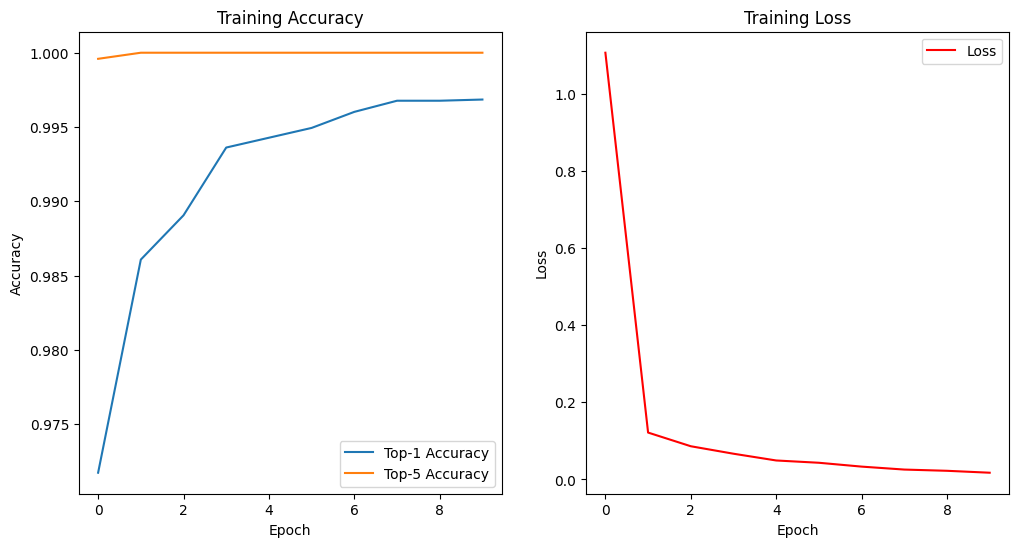

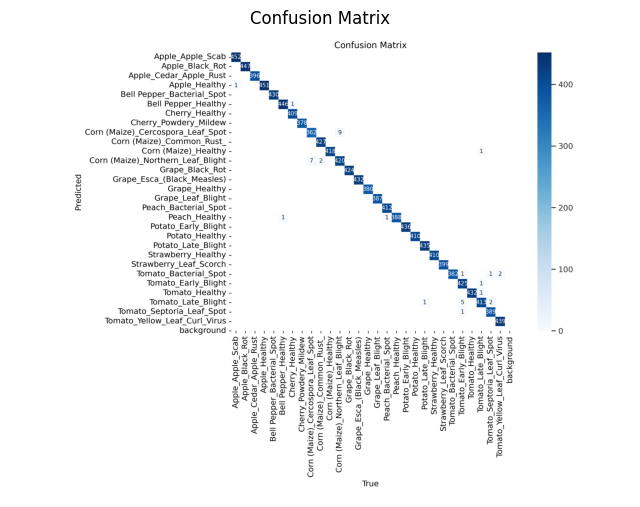

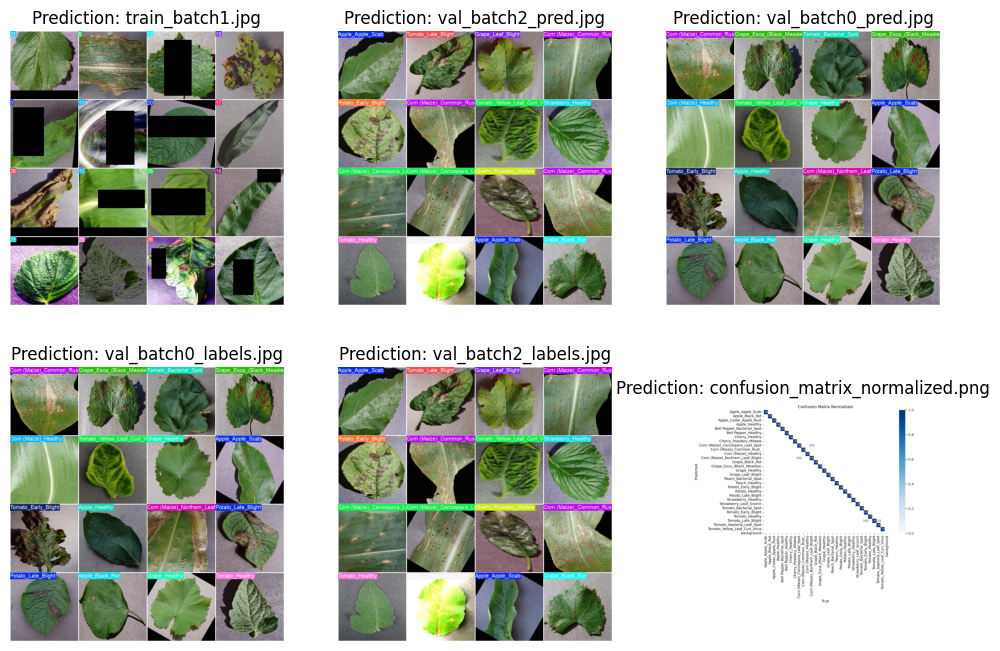

In [5]:
# ==========================
# Run All Visualizations
# ==========================
plot_metrics("/content/train")
plot_confusion_matrix()
visualize_predictions("/content/train")

Image downloaded successfully: /content/image.jpg


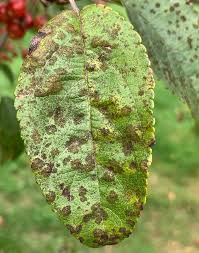


image 1/1 /content/image.jpg: 256x256 Apple_Apple_Scab 0.53, Potato_Early_Blight 0.37, Cherry_Powdery_Mildew 0.03, Strawberry_Leaf_Scorch 0.02, Grape_Leaf_Blight 0.02, 4.7ms
Speed: 61.9ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)


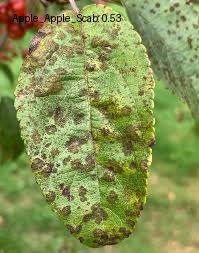

In [3]:
# ==========================
# Download, Display, and Predict an Image
# ==========================
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrhDjUL8CvUcVtmv8_UTpE7hiWA2-x_zKOzw&s"  # Replace with any direct link
image_path = download_image(image_url)
if image_path:
    display_image(image_path)
    predict_and_display(image_path)